<a href="https://colab.research.google.com/github/gani88/ForecastingTimeSeries/blob/main/Forecasting_4_Lag_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we must..

# Understanding Serial Dependence

Serial dependence refers to a characteristic of certain time series where the values of the series at different time points are not independent of each other. In other words, the value of the series at a particular time point is influenced by the values of the series at previous time points. This dependency is often observed when past values of the series provide valuable information for predicting future values.


---


**Time Dependent vs. Serially Dependent Properties**

Earlier in the learning process, you explored time dependent properties of time series. These are properties that can be modeled using features directly derived from the time index, such as trends or seasonal patterns. However, some time series properties can only be effectively captured by considering the serial dependence among the data points.


---


**Using Past Values as Features**

To model time series with serial dependence, you need to consider features that are based on past values of the target series itself. This means that the value of the series at a given time point is used as a feature for predicting the value at a future time point. These lagged or past values act as important inputs to the model because they carry information about the temporal relationships and patterns in the data.


---


**Importance of Plotting Against Past Values**

While the structure of time series with serial dependence may not be immediately apparent from a simple plot over time, plotting the series against its past values can reveal the underlying structure. This kind of plot, often called a **lag plot**, shows how each observation is related to its previous observations. Patterns that might not be evident in a regular time plot can become clearer when visualized in this way.

## Cycles

Cycles in the context of time series refer to patterns of growth and decay that recur over time. These patterns involve how the values of a series at one time point are influenced by the values at previous time points. Unlike other time-dependent patterns that relate to the time index directly, cycles are more about the relationship between past values than the time step itself.

**Characteristics of Cyclic Behavior**

Cyclic behavior is characterized by repetitive fluctuations in the data, where values go through phases of increase and decrease over a certain period. These fluctuations are not purely random but are driven by internal dynamics or external factors affecting the system. Cycles are typically longer in duration compared to shorter-term patterns like seasonality.


---


**Examples of Cycles**

Cycles are commonly observed in various natural and economic phenomena:

- Economies: Economic cycles, such as business cycles, involve periods of economic growth followed by recession and vice versa.
- Epidemics: The spread of infectious diseases can exhibit cyclical behavior as the disease wanes and resurges.
- Ecology: Animal populations might experience cycles of boom and decline due to factors like predator-prey interactions or resource availability.
- Geological Events: Volcano eruptions or seismic activities might exhibit cyclical behavior influenced by geological processes.


---


**Self-Perpetuating and Persisting Dynamics**

Cyclic behavior often emerges from systems that can influence themselves or have reactions that persist over time. This means that the influence of past values on future values is not just based on time itself but on the interactions and dynamics within the system. The patterns in cyclic behavior can be complex and result from a combination of internal and external factors.


---


**Serial Dependence and Cycles**

Cyclic behavior is a classic example of serial dependence in time series. The current value of the series depends on past values, and this dependency is not solely tied to the passage of time but rather to the underlying mechanisms driving the cyclical pattern.

In summary, cycles in time series refer to repetitive patterns of growth and decay that result from complex interactions within a system. These patterns involve serial dependence, where the influence of past values on future values is crucial for understanding the cyclical behavior. Cycles are observed in various natural and economic phenomena and contribute to the richness of temporal patterns in time series data.


## Lagged Series and Lag Plots

To explore the presence of serial dependence, particularly patterns like cycles, within a time series, we use the concept of "lagged" series and lag plots. Lagging involves creating copies of the series where the values are shifted forward by one or more time steps. This provides a way to investigate how past observations relate to present ones.


---


**Lagging a Time Series**

When we lag a time series, we move the values forward in time by a certain number of steps. This can be achieved by shifting the values one or more time steps ahead or equivalently, by shifting the time index backward by the same number of steps. This action essentially creates a new series that represents how the observations would appear to have occurred later in time.


---


**Purpose of Lagging**

Lagging is a technique used to uncover relationships and dependencies between current observations and past observations. By comparing the original series with its lagged versions, we can visually identify potential patterns that might indicate serial dependence, such as cycles or trends.


---

**Observation from Lag Plot**

In the resulting lag plot, you'll observe how the lagged series align with the original series. By visually comparing the original series with its lagged versions, you might notice certain patterns or relationships that were not as evident in the original time plot. These patterns can give insights into possible serial dependencies, such as how values at different time points relate to each other.


---


**Effect of Lagging**

The lagged series provide a different perspective on the data, allowing you to explore temporal dependencies that might not be immediately apparent when examining the series as a whole.

In summary, lagged series and lag plots are techniques used to explore serial dependence in time series data. Lagging involves shifting the values of a series forward in time to create new series, and lag plots help visualize how these lagged series relate to the original series, revealing potential patterns and dependencies in the data.

In [7]:
import pandas as pd

res = pd.read_csv("/content/reserve.csv", parse_dates={'Date' : ['Year', 'Month', 'Day']}, index_col='Date')

y = res.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame(
    {
        'y':y,
        'y_lag1':y.shift(1),
        'y_lag2':y.shift(2)
    }
)

df.head(12)

,y,y_lag1,y_lag2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1
1954-12,5.0,5.3,5.7
1955-01,4.9,5.0,5.3
1955-02,4.7,4.9,5.0
1955-03,4.6,4.7,4.9


Imagine we want to predict the future unemployment rate in the US. We can use the concept of lagging to create lagged versions of the unemployment rate series. Let's say we have two lagged series: y_lag_1 (shifted by 1 time step) and y_lag_2 (shifted by 2 time steps).

If we want to predict the unemployment rate for a particular month, we can use the values of y_lag_1 and y_lag_2 for that same month as features. This approach allows us to forecast the future unemployment rate by considering the unemployment rates in the prior two months.


---


**Benefits of Using Lagged Features**

Using lagged features for predictive modeling acknowledges that past values of the target variable carry information that can help predict its future values. By incorporating these lagged features, the model can capture temporal dependencies and patterns that might be crucial for accurate predictions.

In summary, lagging a time series allows us to align its past values with the values we want to predict, making them contemporaneous. Lagged series are valuable as features for modeling serial dependence because they incorporate historical information into the predictive model. In forecasting scenarios, lagged features enable predictions by considering the relationship between past and future values of the time series.







## Lag Plots



A lag plot is a visualization technique used to examine the relationship between a time series and its lagged values. In a lag plot, the values of the time series are plotted against their corresponding lagged values, revealing patterns and relationships that might indicate serial dependence.


---


**Purpose of Lag Plot**

The primary purpose of creating a lag plot is to uncover potential serial dependence within a time series. Serial dependence refers to the situation where the values at one time point are influenced by the values at previous time points. Lag plots help us visually assess whether the current values of a series are related to its past values.


---


**Interpreting the Lag Plot**

When you look at a lag plot, you're essentially examining the scatter plot formed by plotting the original time series against its lagged values. If there are clear patterns, trends, or clusters in the plot, it indicates the presence of serial dependence.


---


**Example: Lag Plot of US Unemployment**

Consider the example of a lag plot for the US unemployment rate time series. If, in the lag plot, you observe a strong and apparently linear relationship between the current unemployment rate and its past rates, it suggests that the current unemployment rate is influenced by the previous rates.

![image.png](https://storage.googleapis.com/kaggle-media/learn/images/Hvrboya.png)

Autocorrelation is a widely used measure to assess serial dependence in a time series. It measures how correlated a time series is with its own lagged values.


For the US Unemployment time series, its autocorrelation at different lags indicates how closely the current unemployment rate relates to its past rates. For instance, at lag 1, there's a 0.99 autocorrelation, suggesting a very strong correlation between the current rate and the rate from the previous time step. Similarly, at lag 2, the autocorrelation is 0.98, and so on.

High autocorrelation values at specific lags indicate a significant relationship between the current and lagged values. This implies that the current value of the series is strongly influenced by its recent history, which is an indicator of serial dependence.

In summary, autocorrelation quantifies the relationship between a time series and its own past values. In the case of the US Unemployment series, high autocorrelation values at various lags suggest a strong serial dependence, where the current unemployment rate is closely tied to its previous rates.

---


**Identifying Patterns and Dependencies**

In the context of the US Unemployment rate lag plot, a strong linear relationship between the current rate and its past rates indicates that the unemployment rate's behavior is tied to its historical values. This is a form of serial dependence where the current state is influenced by its recent history.


---


**Usefulness of Lag Plot**

A lag plot provides a visual way to detect potential serial dependence, helping to guide further analysis and modeling. If you observe certain patterns, correlations, or trends in the lag plot, it suggests that the time series might exhibit temporal dependencies that can be captured using appropriate modeling techniques.

In summary, a lag plot visually displays the relationship between a time series and its lagged values. It's a valuable tool for identifying serial dependence, as patterns and trends in the plot can reveal how current observations are related to their past values. The presence of a strong and linear relationship in a lag plot can indicate significant temporal dependencies in the time series data.


## Partial Autocorrelation
Partial autocorrelation measures the correlation of a specific lag while accounting for the influence of all preceding lags. It captures the "new" correlation that the lag contributes beyond the correlations explained by earlier lags.


By plotting the partial autocorrelation, you can identify which lag features are most influential in explaining the unique correlations in the data. This helps you choose the lag features that effectively capture the relevant information for modeling serial dependence.

# Case Example
This example is from kaggle

<ipython-input-8-00414da6a7ae>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


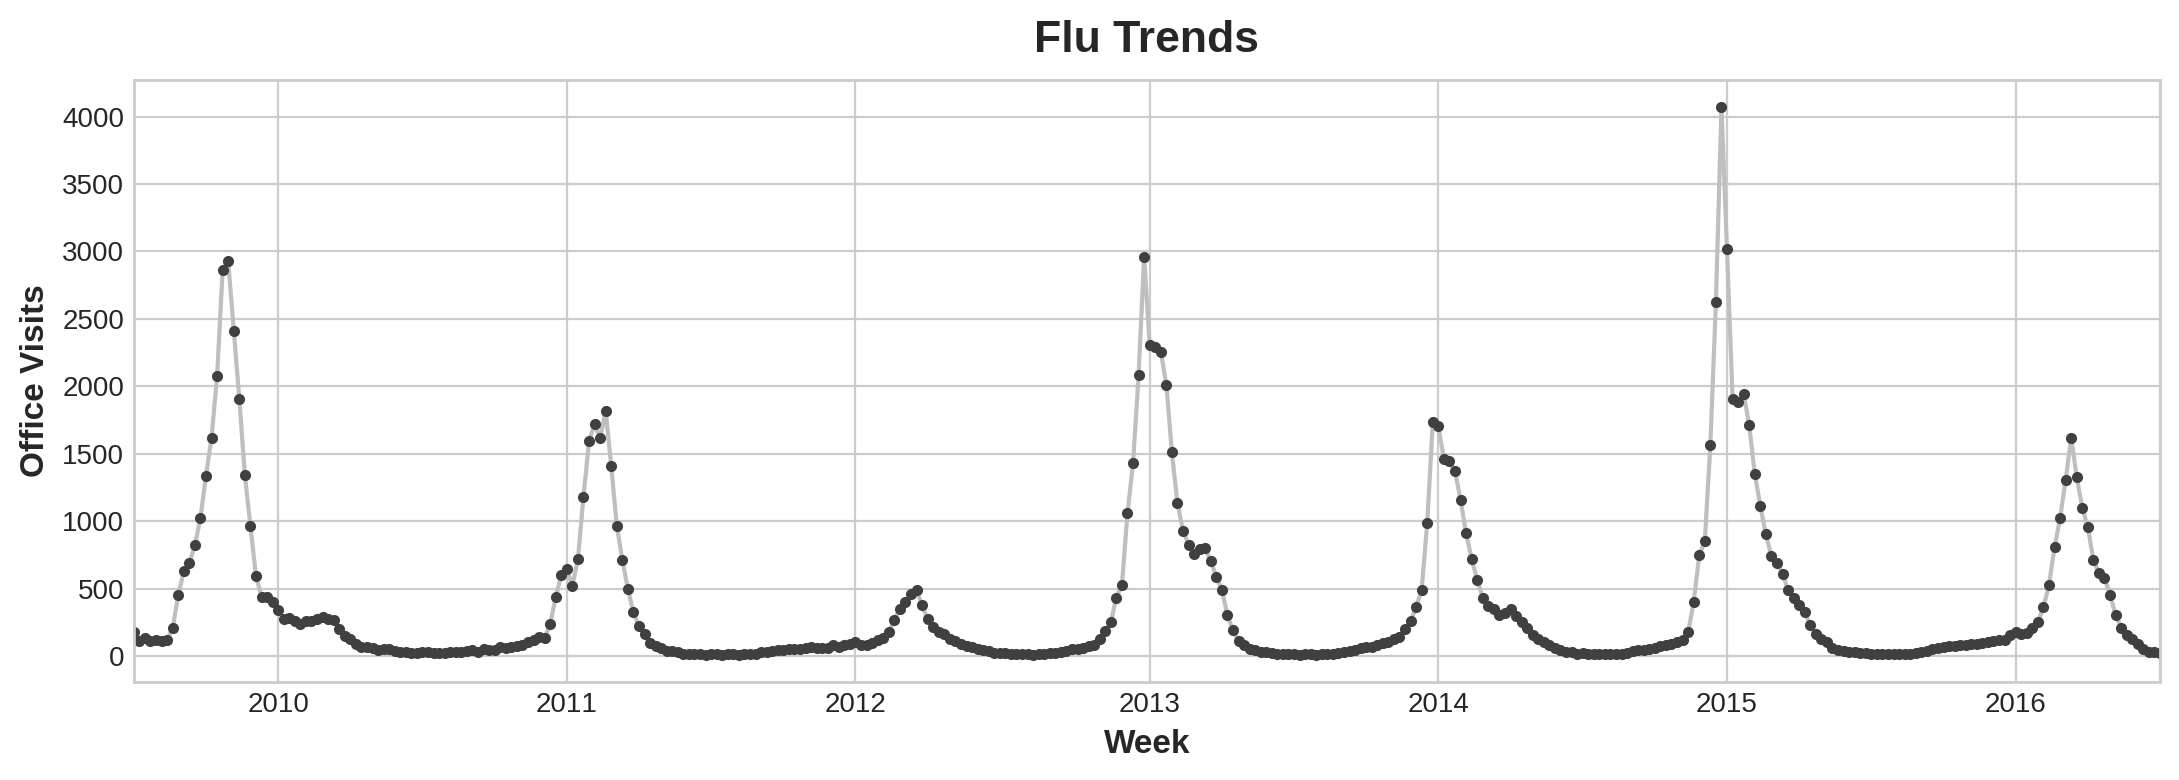

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig



flu_trends = pd.read_csv("/content/flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

The data displays irregular cycles rather than consistent seasonality: the peak typically happens around the new year, but occasionally it can occur earlier or later, and the magnitude may vary. Utilizing lag features to model these cycles empowers our forecaster to adapt responsively to shifting conditions, avoiding the constraint of rigid dates and times associated with seasonal features.

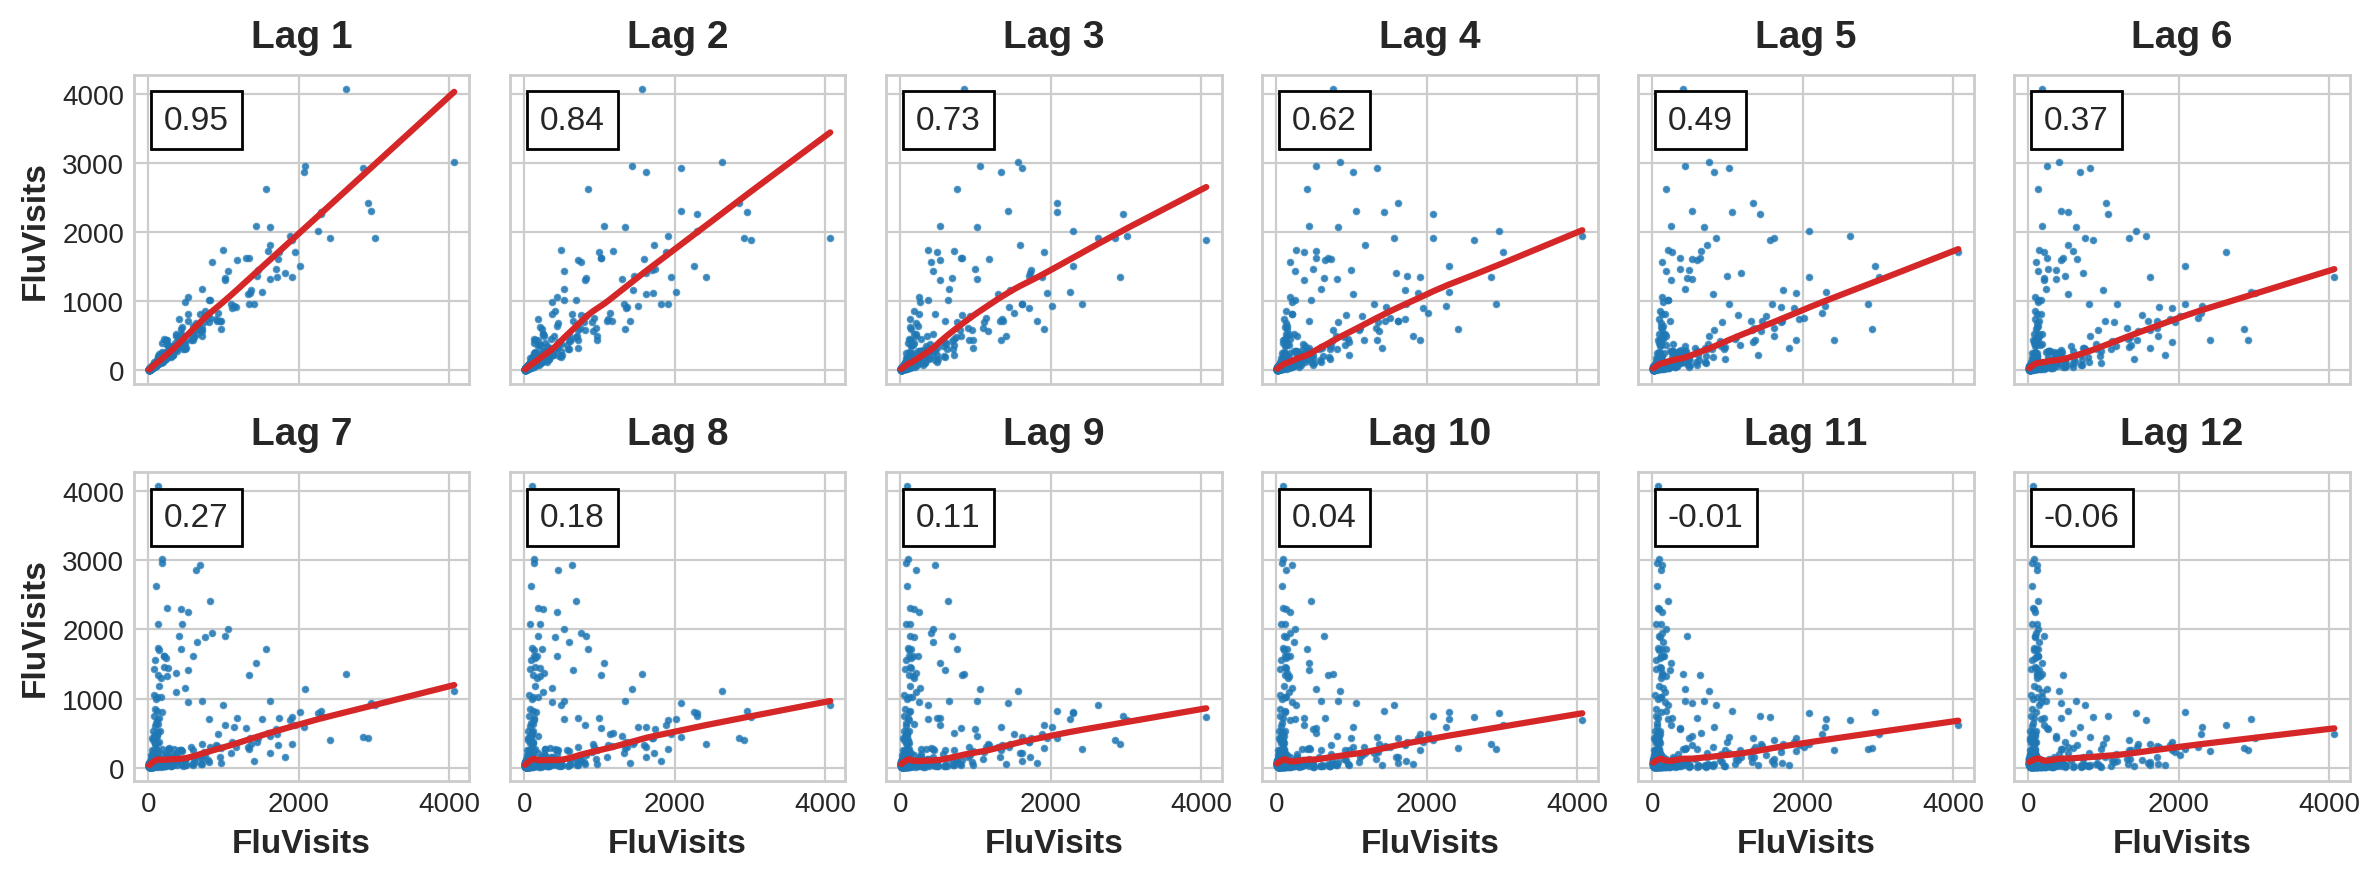

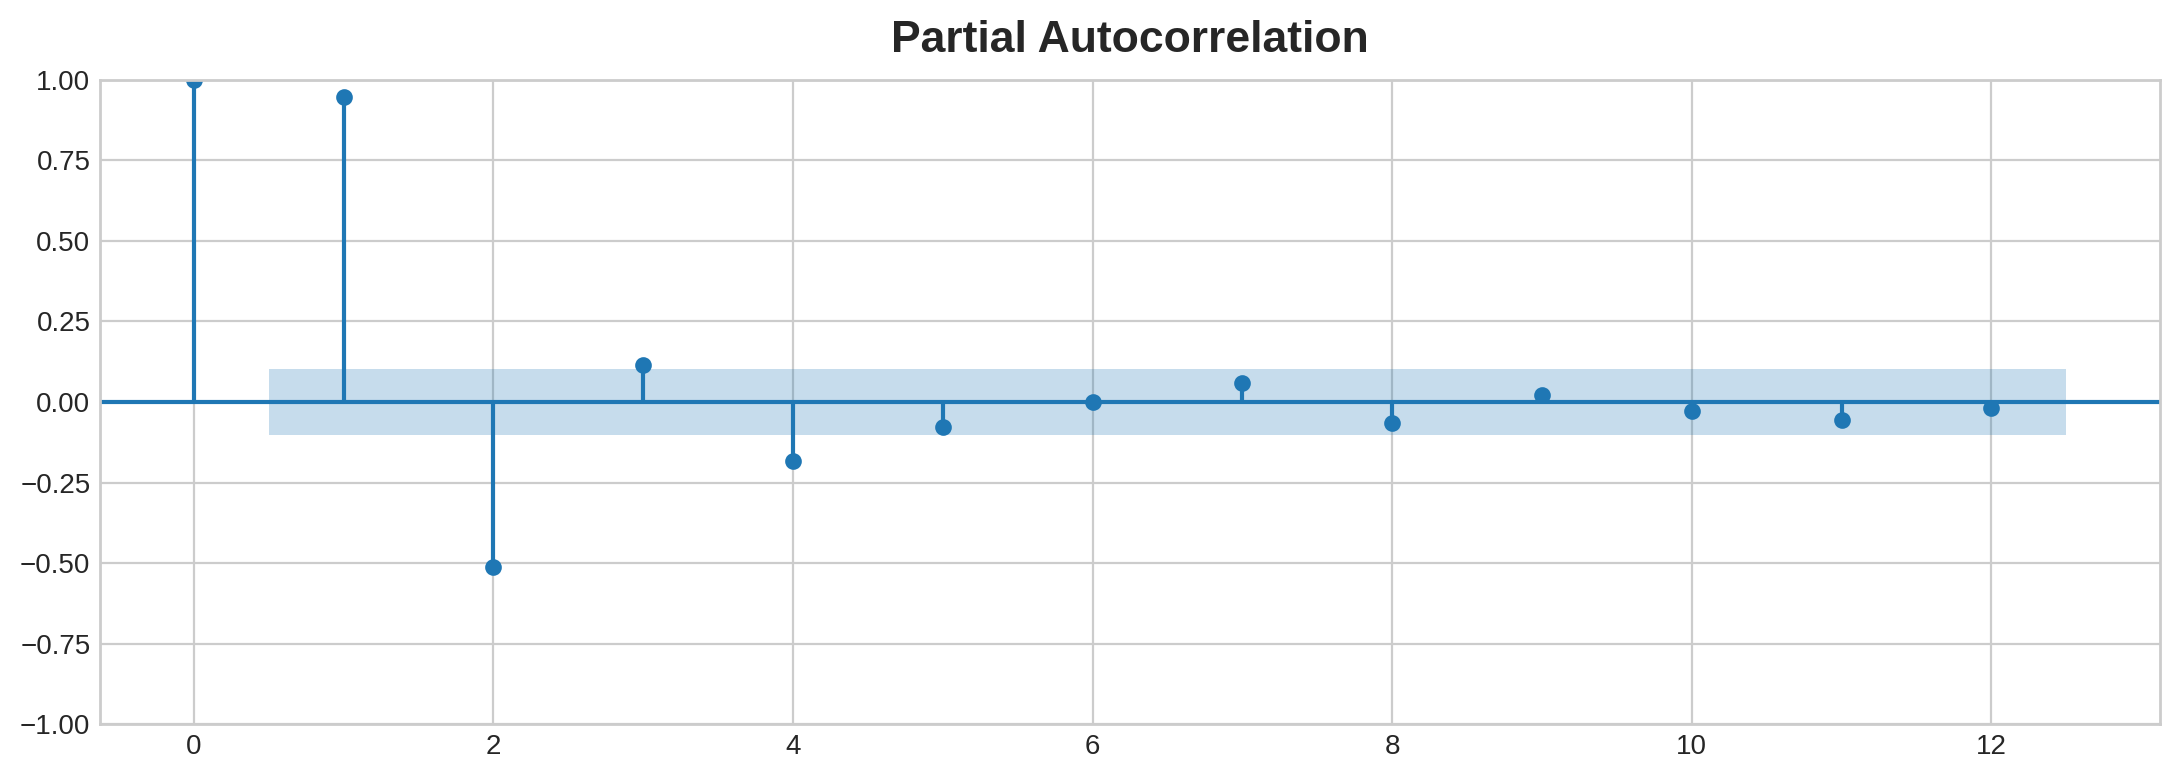

In [10]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)


The lag plots reveal a predominantly linear connection between FluVisits and its lagged values, whereas the partial autocorrelations indicate that the dependency can be effectively represented using lags 1, 2, 3, and 4. We can create lagged versions of a time series using the Pandas shift method. In this scenario, we'll address the gaps generated by lagging by filling them with a value of 0.0.

In [11]:
def make_lags(ts, lags):
  return pd.concat(
      {
          f'y_lag_{i}':ts.shift(i)
          for i in range(1, lags+1)
      },
      axis=1
  )

X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

 Previously we had the flexibility to make forecasts for any number of future steps beyond our training data. However, when incorporating lag features, our forecasting capabilities are constrained by the availability of lagged values. For instance, if we utilize a lag 1 feature on a Monday, we cannot predict the outcome for Wednesday because the necessary lag 1 value from Tuesday is not yet available as Tuesday is yet to occur.